In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import utils

In [2]:
mu_mult = 2.
cov_mult = 1.
skew = 5.
biased_prop_mtx = [[0.49, 0.01], [0.49, 0.01]]
biased_train_x, biased_train_a, biased_train_y = utils.simul_x_y_a(biased_prop_mtx,\
     n = 60, mu_mult=mu_mult, cov_mult=cov_mult, skew = skew)

biased_test_x, biased_test_a, biased_test_y = utils.simul_x_y_a(biased_prop_mtx, \
    n = 1000, mu_mult = mu_mult, cov_mult=cov_mult, skew=skew)


In [3]:
fair_prop_mtx = [[0.25, 0.25], [0.25, 0.25]]
fair_train_x, fair_train_a, fair_train_y = utils.simul_x_y_a(fair_prop_mtx, n = 2000,\
     mu_mult=mu_mult, cov_mult=cov_mult, skew = skew)
fair_test_x, fair_test_a, fair_test_y = utils.simul_x_y_a(fair_prop_mtx, n = 1000, mu_mult=mu_mult, \
    cov_mult=cov_mult, skew = skew)

In [4]:
cl_unfair = LogisticRegression(max_iter=1000)
cl_unfair.fit(biased_train_x, biased_train_y)
error_biased = np.mean(np.absolute(biased_test_y - cl_unfair.predict(biased_test_x)))
error_fair = np.mean(np.absolute(fair_test_y - cl_unfair.predict(fair_test_x)))
error_biased, error_fair

(0.041, 0.258)

In [11]:
coef, intercept = cl_unfair.coef_.reshape((-1,)), cl_unfair.intercept_.reshape(())
u = biased_test_x[:, 0]
v = -( intercept + coef[0] * u )/coef[1]
print(f'Self-trained model: coef {coef}, intercept {intercept}\n')

Self-trained model: coef [-0.55832336  6.31070178], intercept -26.01165182793167



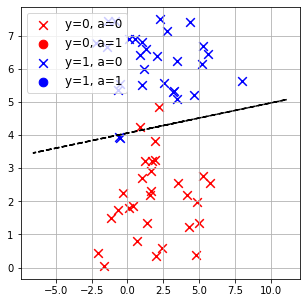

In [6]:
ax = utils.plot_scatter_sample(biased_train_x, biased_train_y, biased_train_a, line = [u, v])

In [7]:
cl_self_trained = cl_unfair
for i in range(100):
    pseudo_fair_train_y = cl_self_trained.predict(fair_train_x)
    augmented_x = np.concatenate([biased_train_x, fair_train_x], axis = 0)
    augmented_y = np.concatenate([biased_train_y, pseudo_fair_train_y], axis = 0)
    cl_self_trained.fit(augmented_x, augmented_y)
coef, intercept = cl_self_trained.coef_.reshape((-1, )), cl_self_trained.intercept_.reshape(())
print(f'Self-trained model: coef {coef}, intercept {intercept}\n')    
error_biased = np.mean(np.absolute(biased_test_y - cl_self_trained.predict(biased_test_x)))
error_fair = np.mean(np.absolute(fair_test_y - cl_self_trained.predict(fair_test_x)))
error_biased, error_fair

Self-trained model: coef [-0.55832336  6.31070178], intercept -26.01165182793167



(0.04, 0.257)

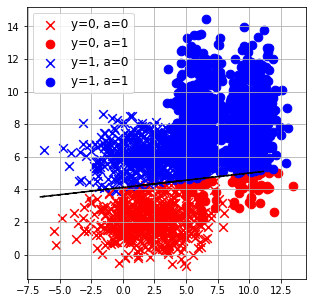

In [8]:
augmented_a = np.concatenate([biased_train_a, fair_train_a], axis = 0)
coef, intercept = cl_self_trained.coef_.reshape((-1,)), cl_self_trained.intercept_
u = biased_test_x[:, 0]
v = -( intercept[0] + coef[0] * u )/coef[1]
utils.plot_scatter_sample(augmented_x, augmented_y, augmented_a, line=[u, v])

import fair_self_training as fair 
import numpy as np
import pandas as pd
from itertools import product

p = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
errors = []
def f(delta = 0.1, index = 0):
    p_biased = [[0.25 + delta, 0.25 - delta], [0.25 - delta, 0.25 + delta]]
    error_dict =  fair.biased_vs_fair_test_error(p_biased)
    error_dict['delta'] = delta
    error_dict['iter-index'] = index
    return error_dict

for delta, index in product(p, range(100)):
    error_dict = f(delta, index)
    errors.append(error_dict)

d = pd.DataFrame(errors)

d

### Self-training with LDA

In [30]:
mu = 3.
prop = 0.1
# Labeled biased data
biased_train_x, biased_train_y = utils.sim_x_y(prop, n = 60, mu = mu)

# Unlableled fair data and test data
fair_train_x, fair_train_y = utils.sim_x_y(0.5, n = 2000, mu=mu)
fair_test_x,  fair_test_y = utils.sim_x_y(0.5, n = 2000, mu=mu)

In [31]:
cl_unfair = LogisticRegression(max_iter=1000)
cl_unfair.fit(biased_train_x, biased_train_y)
error_biased = np.mean(np.absolute(biased_test_y - cl_unfair.predict(biased_test_x)))
error_fair = np.mean(np.absolute(fair_test_y - cl_unfair.predict(fair_test_x)))
error_biased, error_fair

(0.288, 0.0325)

In [32]:
coef, intercept = cl_unfair.coef_.reshape((-1,)), cl_unfair.intercept_.reshape(())
u = biased_test_x[:, 0]
v = -( intercept + coef[0] * u )/coef[1]
print(f'Self-trained model: coef {coef}, intercept {intercept}\n')

Self-trained model: coef [1.43295353 1.36139529], intercept -5.396806648720586



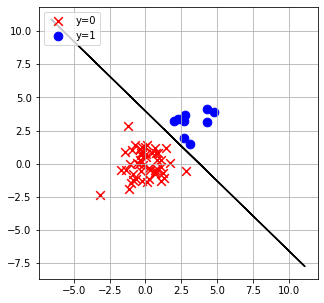

In [33]:
ax = utils.plot_x_y(biased_train_x, biased_train_y, line = [u, v])

In [34]:
cl_self_trained = cl_unfair
for i in range(100):
    pseudo_fair_train_y = cl_self_trained.predict(fair_train_x)
    augmented_x = np.concatenate([biased_train_x, fair_train_x], axis = 0)
    augmented_y = np.concatenate([biased_train_y, pseudo_fair_train_y], axis = 0)
    cl_self_trained.fit(augmented_x, augmented_y)
coef, intercept = cl_self_trained.coef_.reshape((-1, )), cl_self_trained.intercept_.reshape(())
print(f'Self-trained model: coef {coef}, intercept {intercept}\n')    
error_biased = np.mean(np.absolute(biased_test_y - cl_self_trained.predict(biased_test_x)))
error_fair = np.mean(np.absolute(fair_test_y - cl_self_trained.predict(fair_test_x)))
error_biased, error_fair

Self-trained model: coef [4.30877266 3.88373579], intercept -12.970879729064253



(0.324, 0.019)

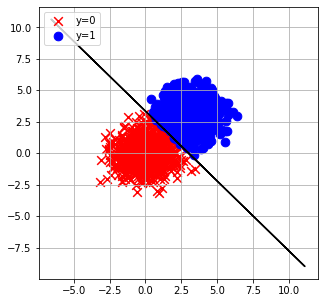

In [35]:
augmented_a = np.concatenate([biased_train_a, fair_train_a], axis = 0)
coef, intercept = cl_self_trained.coef_.reshape((-1,)), cl_self_trained.intercept_
u = biased_test_x[:, 0]
v = -( intercept[0] + coef[0] * u )/coef[1]
utils.plot_x_y(augmented_x, augmented_y, line=[u, v])